In [1]:
%pylab inline
from SimPEG import DCIP as DC

Populating the interactive namespace from numpy and matplotlib
Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


In [2]:
"../data/ChungCheonDC/"

'../data/ChungCheonDC/'

In [3]:

def readReservoirDC(fname):
    f = open(fname, 'r')
    data = f.readlines()
    temp = data[3].split()
    nelec, ndata, aspacing = int(temp[0]), int(temp[1]), float(temp[2])
    ntx = nelec-2
    datalist = []
    for iline, line in enumerate(data[4:4+ndata]):
    #     line = line.replace(ignorevalue, 'nan')
        linelist = line.split()    
        datalist.append(np.array(map(float, linelist)))
    DAT = np.vstack(datalist)
    datalistSRC = []
    srcList = []
#     for i in range(ntx-1):
    for i in range(ntx-1):        
        txloc = np.array([i+2, i+1.])
        ind = (DAT[:,:2] == txloc).sum(axis=1) == 2.
        temp = DAT[ind,:]
        datalistSRC.append(temp)
        e = np.zeros_like(temp[:,2])
        rxtemp = DC.RxDipole(np.c_[temp[:,2]*aspacing, e, e], np.c_[temp[:,3]*aspacing, e, e])
        srctemp = DC.SrcDipole([rxtemp], np.r_[txloc[1]*aspacing, 0., 0.], np.r_[txloc[0]*aspacing, 0., 0.])
        srcList.append(srctemp)
    DAT_src = np.vstack(datalistSRC)    
    survey = DC.SurveyDC(srcList)
    survey.dobs = DAT_src[:,-1]
    return survey

In [32]:
fname1 = "../data/ChungCheonDC/20150101000000.apr"
fname2 = "../data/ChungCheonDC/20150108120000.apr"

In [33]:
survey1 = readReservoirDC(fname1)
survey2 = readReservoirDC(fname2)
survey12 = readReservoirDC(fname2)

In [42]:
# ind = (survey1.dobs > 200.) | (survey2.dobs > 200.)
# survey1.dobs[ind] = np.median(survey1.dobs)
# survey2.dobs[ind] = np.median(survey2.dobs)

(array([  41.,  117.,  114.,   62.,   30.,   12.,    3.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([  52.0794 ,   67.07093,   82.06246,   97.05399,  112.04552,
         127.03705,  142.02858,  157.02011,  172.01164,  187.00317,
         201.9947 ,  216.98623,  231.97776,  246.96929,  261.96082,
         276.95235,  291.94388,  306.93541,  321.92694,  336.91847,  351.91   ]),
 <a list of 20 Patch objects>)

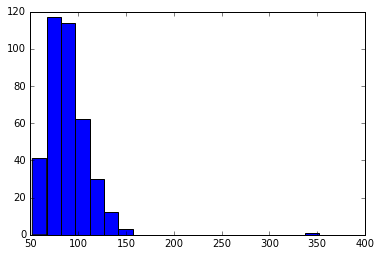

In [43]:
hist(survey1.dobs, bins=20)

(array([  1.,   0.,   0.,   1.,   0.,   4.,  14.,  39.,  57.,  69.,  62.,
         40.,  24.,  27.,  17.,  10.,   7.,   6.,   1.,   1.]),
 array([  11.9585  ,   19.259575,   26.56065 ,   33.861725,   41.1628  ,
          48.463875,   55.76495 ,   63.066025,   70.3671  ,   77.668175,
          84.96925 ,   92.270325,   99.5714  ,  106.872475,  114.17355 ,
         121.474625,  128.7757  ,  136.076775,  143.37785 ,  150.678925,
         157.98    ]),
 <a list of 20 Patch objects>)

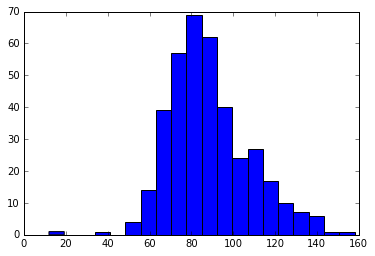

In [44]:
hist(survey2.dobs, bins=20)

In [45]:
survey12.dobs = abs(survey2.dobs-survey1.dobs) / abs(survey1.dobs)

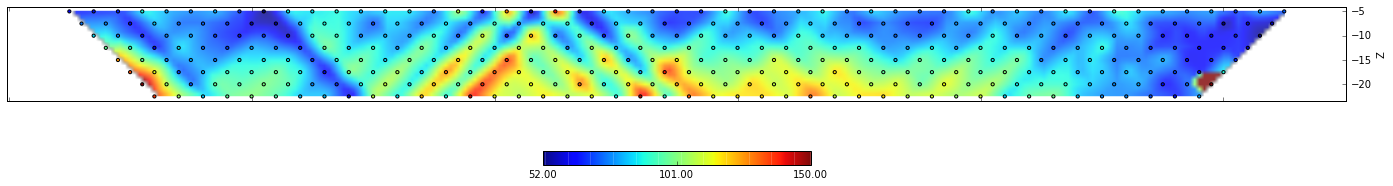

In [46]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey1, ax, "dpdp", dtype="appr", clim=[52, 150.])

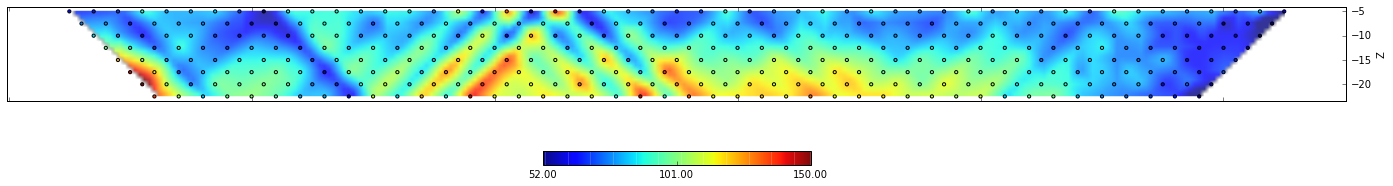

In [47]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey2, ax, "dpdp", dtype="appr", clim=[52, 150.])

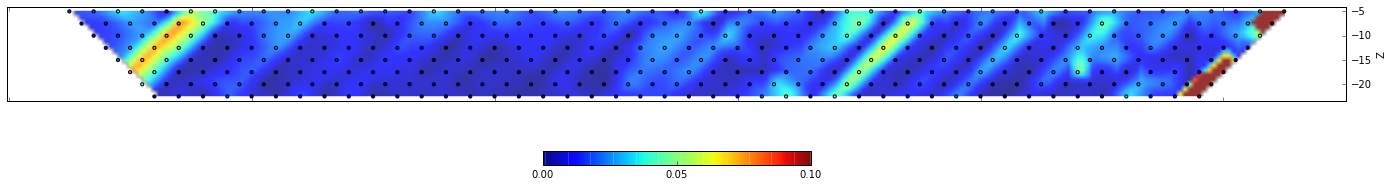

In [48]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey12, ax, "dpdp", dtype="appr", clim=[0., 0.1])